In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


reinstall keras

In [ ]:
# !pip show keras

installing keras_utils (missing)

In [ ]:
# !pip install keras-utils

In [ ]:
# !pip install --upgrade keras

if not working then use below code to import modules as from new version of keras some modules are removed

In [14]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from IPython.display import Image
from keras.models import model_from_json


In [15]:
json_file = open('/content/drive/MyDrive/IPCV/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Loading saved weights into new model
loaded_model.load_weights("/content/drive/MyDrive/IPCV/model.h5")

Loading Image for Testing

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
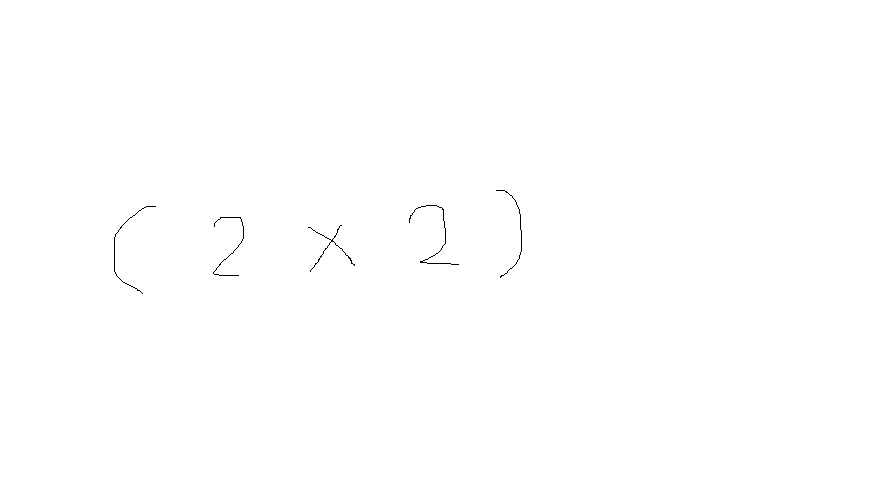

In [16]:
img = cv2.imread('/content/drive/MyDrive/IPCV/test/test5.jpg',cv2.IMREAD_GRAYSCALE)
img

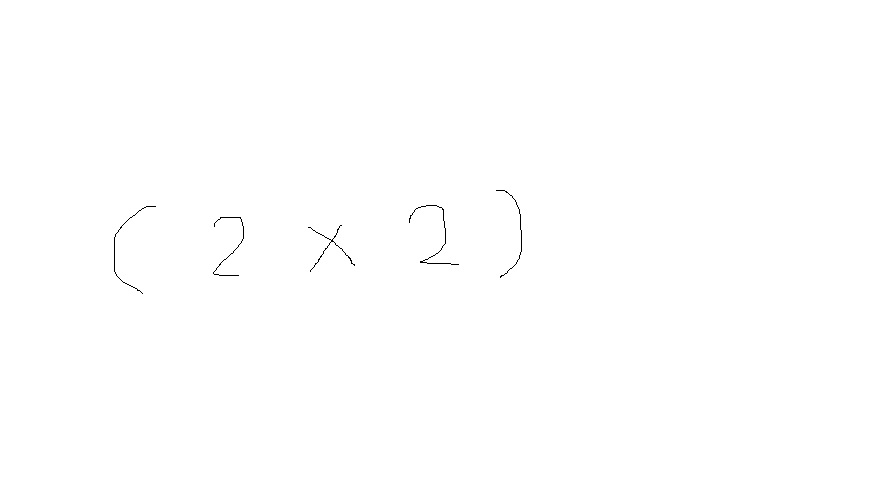

In [17]:
from IPython.display import Image
Image('/content/drive/MyDrive/IPCV/test/test5.jpg',width = 250)

In [6]:
test_images = ['/content/drive/MyDrive/IPCV/test/test1.jpg']

# Predict labels for test images
predicted_labels = []
true_labels = ['70+2*5']


In [18]:
cv2.waitKey(0)
cv2.destroyAllWindows()

if img is not None:
    img =~ img
    ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    ctrs, ret = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []

    rects = []

    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0

            if (rec!=r):
                if (r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10)):
                    flag = 1
                l.append(flag)

            if (rec == r):
                l.append(0)

        bool_rect.append(l)

    dump_rect = []

    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2]*rects[i][3]
                area2 = rects[j][2]*rects[j][3]
                if(area1 == min(area1,area2)):
                    dump_rect.append(rects[i])

    final_rect=[i for i in rects if i not in dump_rect]

    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h+10,x:x+w+10]

        im_resize = cv2.resize(im_crop,(28,28))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28,1))
        train_data.append(im_resize)

In [19]:
s = ""

for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)

    result = (loaded_model.predict(train_data[i]) > 0.5).astype("int32")

    if(result[0][0]==1):
        s=s+'0'

    if(result[0][1]==1):
        s=s+'1'

    if(result[0][2]==1):
        s=s+'2'

    if(result[0][3]==1):
        s=s+'3'

    if(result[0][4]==1):
        s=s+'4'

    if(result[0][5]==1):
        s=s+'5'

    if(result[0][6]==1):
        s=s+'6'

    if(result[0][7]==1):
        s=s+'7'

    if(result[0][8]==1):
        s=s+'8'

    if(result[0][9]==1):
        s=s+'9'

    if(result[0][10]==1):
        s=s+'-'

    if(result[0][11]==1):
        s=s+'+'

    if(result[0][12]==1):
        s=s+'*'

    # if(result[0][13]==1):
    #     s=s+'/'

    if(result[0][14]==1):
        s=s+'('
    if(result[0][15]==1):
        s=s+')'
predicted_labels.append(s)
print("\n", "The evaluation of the image gives equation : ", s, "\n")

1/1 [==============================] - 0s 24ms/step

 The evaluation of the image gives equation :  (2*2) 



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


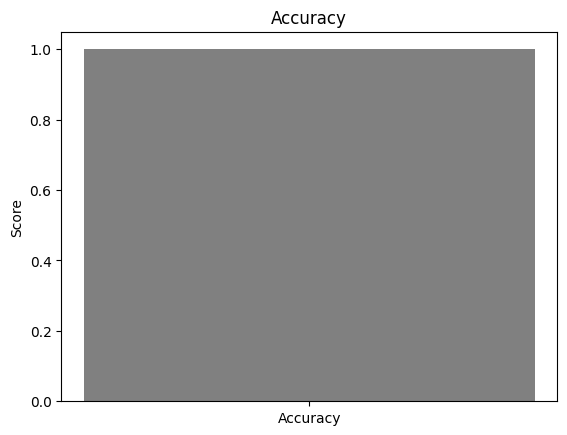

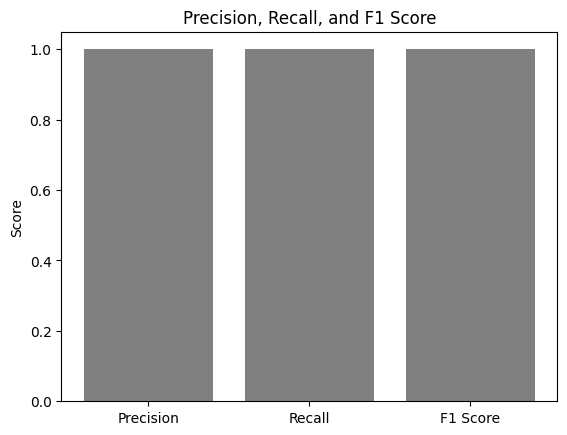

In [11]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.bar(['Accuracy'], [accuracy], color='gray')
plt.title('Accuracy')
plt.ylabel('Score')
plt.show()

# Plotting precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

# Using a single color for all bars
plt.bar(metrics, scores, color='gray')
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.show()


In [20]:
print("\n"*2, "The evaluation of the image gives --> ", s, " = ", eval(s), "\n")



 The evaluation of the image gives -->  (2*2)  =  4 

